In [72]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib 

matplotlib.rcParams['lines.linewidth'] = 8

%matplotlib inline

In [119]:
crops = OrderedDict()
crops['Barley'] =  {'sowing': [11, 12],
                    'growing': [12, 6.5],
                    'harvesting': [6.5, 7.5]}

crops['Maize'] = {'sowing': [4, 5.5],
                  'growing': [5.5, 8.5],
                  'harvesting': [8.5, 10.5]}

crops['Millet'] = {'sowing': [6, 7],
                   'growing': [7, 9.5],
                   'harvesting': [9.5, 10.5]}

crops['Potatoes'] = {'sowing': [3, 4.5],
                     'growing': [4.5, 6.5],
                     'harvesting': [6.5, 7.5]}
         
crops['Rice'] = {'sowing': [6.5, 7.5],
                 'growing': [7.5, 10.5],
                 'harvesting': [10.5, 11.5]}
         
crops['Sorghum'] = {'sowing': [4, 6],
                    'growing': [6, 9.5],
                    'harvesting': [9.5, 10.5]}

crops['Sweet\nPotatoes'] = {'sowing': [3.5, 4.5],
                           'growing': [4.5, 8.5],
                           'harvesting': [8.5, 9.5]}

crops['Wheat'] = {'sowing': [11, 12.5],
                  'growing': [12.5, 6],
                  'harvesting': [6, 7]}

In [120]:
npoints = 100

colors = {'sowing': (122/256., 78/256., 33/256., 1),
          'growing': (107/256., 187/256., 66/256., 1),
          'harvesting': (255/256., 206/256., 5/256., 1)}

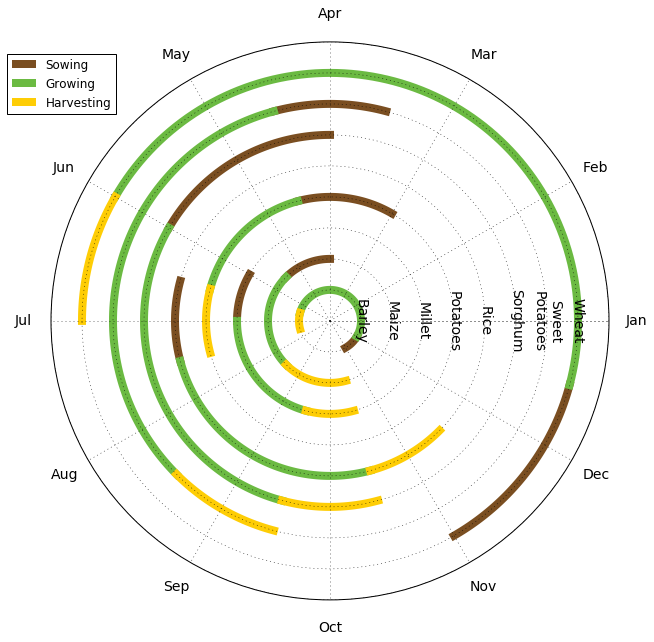

In [179]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

for i, (crop_name, crop) in enumerate(crops.items()):
    for season_name, season_time in crop.items():
        start_angle = (season_time[0]-1)/12. * 2. * np.pi 
        end_angle = (season_time[1]-1)/12. * 2. * np.pi

        if start_angle > end_angle:
            end_angle += 2.*np.pi

        color = colors[season_name]

        ax.plot(np.linspace(start_angle, end_angle, npoints),
                np.ones(npoints)*((i+1)/8.), color=color)
        
    #xtext = (np.min(crop['sowing'])-1)/12. * 2. * np.pi
    xtext = 0
    bbox = {'fc': 'none', 'pad': 0, 'edgecolor': 'none'}
    props = {'ha': 'center', 'va': 'center', 'bbox': bbox}
    ax.text(xtext, (i+1)/8., crop_name, props, rotation = -90, fontsize=14)

_ = ax.set_xticks(np.linspace(0, 360, 13)*np.pi/180.)
_ = ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      fontsize=14)

#_ = ax.set_yticks(np.linspace(0, 1.1, 2))


#_ = ax.set_yticklabels(['Barley', 'Maize', 'Millet', 'Potatoes', 'Rice', 'Sorghum', 'Sweet\nPotatoes', 'Wheat'],
#                       fontsize=14, rotation=-45)

ax.plot([0, 0], [0, 0], color=colors['sowing'], label='Sowing')
ax.plot([0, 0], [0, 0], color=colors['growing'], label='Growing')
ax.plot([0, 0], [0, 0], color=colors['harvesting'], label='Harvesting')

leg = plt.legend( loc = 'upper left')

plt.draw() # Draw the figure so you can find the positon of the legend. 

_ = ax.set_yticks(np.arange(1, 10)/8.)
_ = ax.set_yticklabels([])

# Get the bounding box of the original legend
bb = leg.legendPatch.get_bbox().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.1
newX0 = bb.x0 - xOffset
newX1 = bb.x1 - xOffset
bb.set_points([[newX0, bb.y0], [newX1, bb.y1]])
leg.set_bbox_to_anchor(bb)

# Update the plot
#plt.show()

fig.savefig('DPRK_crops.jpeg', dpi=100)